### Installing yfinance Libraries

In [58]:
# Installing yfinance
!pip install yfinance

### Installing Quantstats Libraries

In [60]:
# Installing Quantstats
!pip install quantstats

### Installing PyPortfolioOpt Libraries

In [62]:
# installing PyPortfolioOpt
!pip install pyportfolioopt

### Installing the TA (Technical Analysis) library

In [64]:
# Installing the TA (Technical Analysis) library
!pip install ta

In [65]:
!pip install pandas_datareader

### Importing Libraries

In [4]:
# Data handing and static analysis
import pandas as pd 
import numpy as np 
from pandas_datareader import data
from scipy import stats

# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Financial data 
import quantstats as qs
import ta
import yfinance as yf

# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime and hiding warnings 
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

### Daily Returns

ด้วยไลบรารี Quantstats นักลงทุนสามารถสร้างกราฟผลตอบแทนรายวันได้ ซึ่งช่วยให้:
-เห็นความเคลื่อนไหว (ขึ้น-ลง) ของหุ้นแบบวันต่อวัน
-วิเคราะห์ความผันผวนและความสม่ำเสมอของผลตอบแทน
จะใช้ quantstats.utils.download_returns() เพื่อ ดึงข้อมูลผลตอบแทนรายวันของหุ้นสหรัฐฯ 4 ตัว ในช่วงเวลาเดียวกัน

In [29]:
start_date = '2014-01-01'
end_date = '2024-12-31'

aapl = qs.utils.download_returns('AAPL')
aapl = aapl.loc[start_date:end_date]

msft = qs.utils.download_returns('MSFT')
msft = msft.loc[start_date:end_date]

nvda = qs.utils.download_returns('NVDA')
nvda = nvda.loc[start_date:end_date]

amzn= qs.utils.download_returns('AMZN')
amzn = amzn.loc[start_date:end_date]

goog = qs.utils.download_returns('GOOG')
goog = goog.loc[start_date:end_date]

meta = qs.utils.download_returns('META')
meta = meta.loc[start_date:end_date]

tsla = qs.utils.download_returns('TSLA')
tsla = tsla.loc[start_date:end_date]

sp500 = qs.utils.download_returns('^GSPC') # ^GSPC คือชื่อดัชนี S&P 500 บน Yahoo Finance
sp500 = sp500.loc[start_date:end_date]

list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla]

for symbol in list_stocks:
    name = 'S&P500' if symbol.columns[0] == '^GSPC' else symbol.columns[0]
    print(f'Number of rows {name} : {len(symbol)}')

print('\n✅ Getting info for stocks complete!')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Number of rows AAPL : 2768
Number of rows MSFT : 2768
Number of rows NVDA : 2768
Number of rows AMZN : 2768
Number of rows GOOG : 2768
Number of rows META : 2768
Number of rows TSLA : 2768

✅ Getting info for stocks complete!


ลบ timezone ออก ทำให้กลายเป็น tz-naive (ไม่มี timezone)
สมมุติว่า aapl.index มี timezone เป็น UTC จะลบ timezone ออกทำให้ aapl.index กลายเป็น tz-naive ซึ่งสามารถนำไปใช้ในกรณีที่ไม่ต้องการทำงานกับ timezone ในการคำนวณหรือกราฟ

In [32]:
for df in list_stocks:
    if df.index.tz is not None:
        df.index = df.index.tz_convert(None)

print('✅ Set up complete!')

✅ Set up complete!


### Plot the *daily returns* chart for each of them using Quantstats


AAPL Daily Returns Plot:



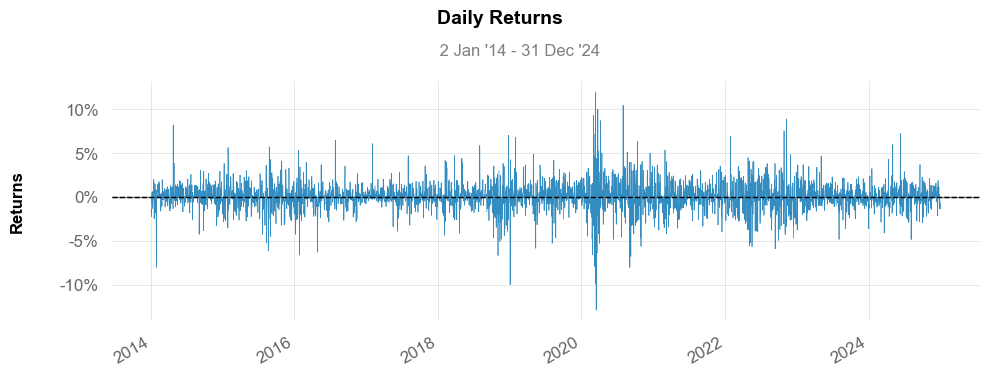




MSFT Daily Returns Plot:



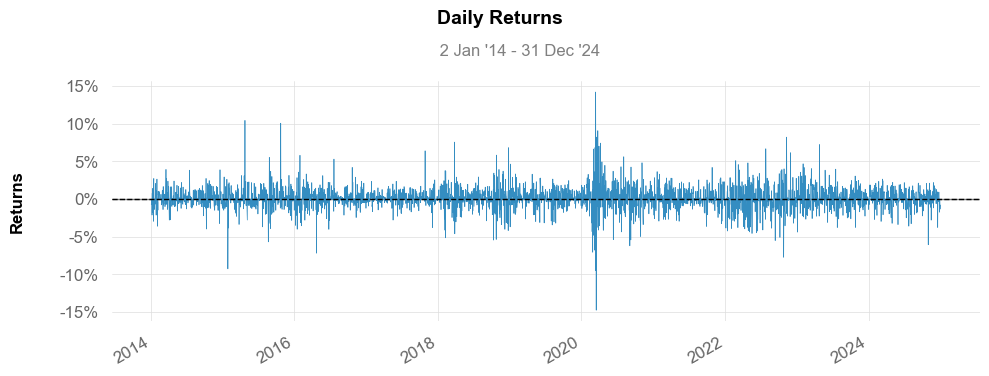




NVDA Daily Returns Plot:



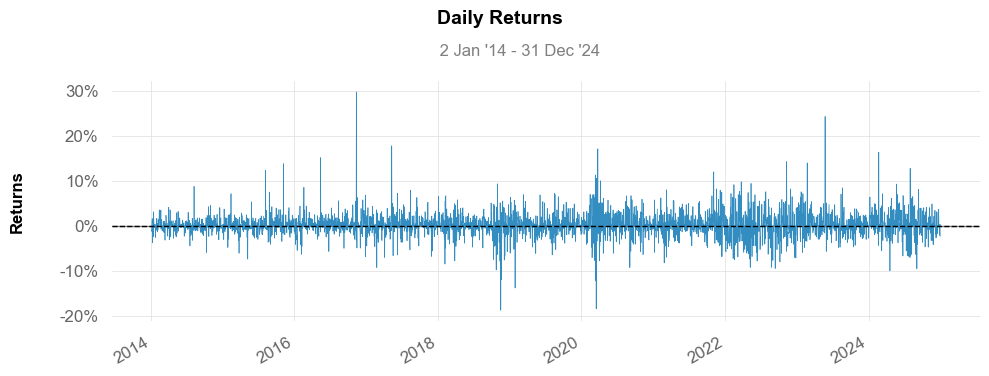




AMZN Daily Returns Plot:



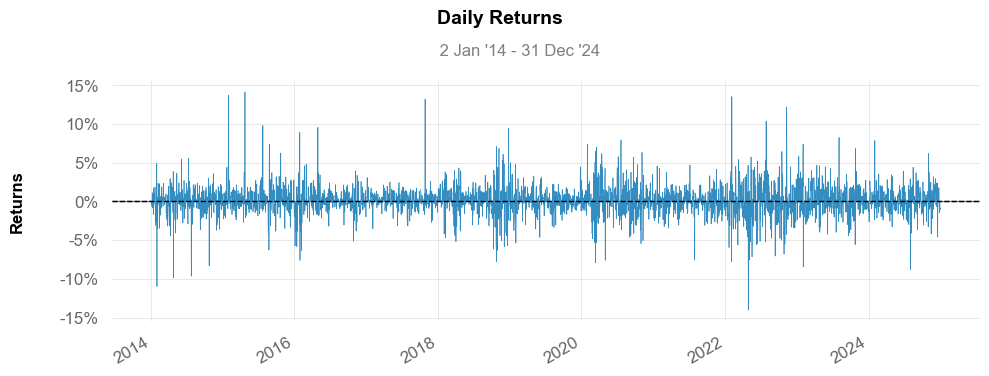




GOOG Daily Returns Plot:



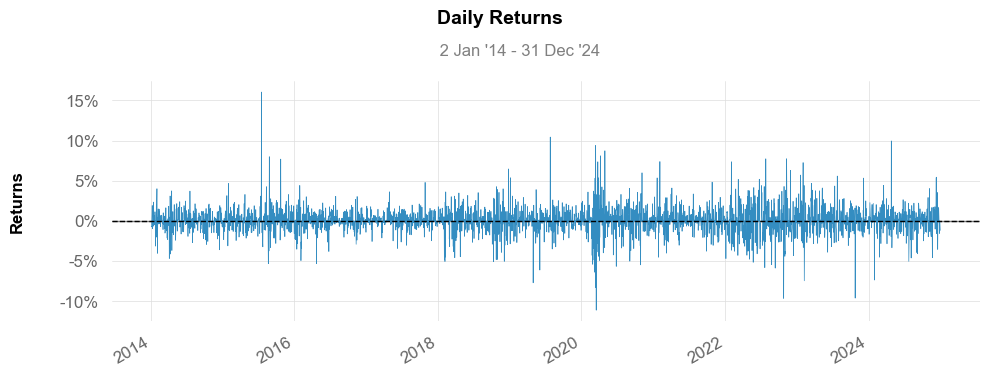




META Daily Returns Plot:



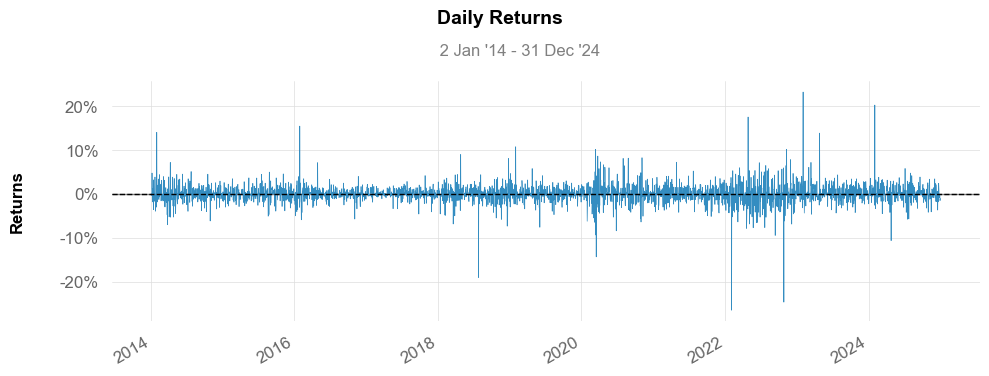




TSLA Daily Returns Plot:



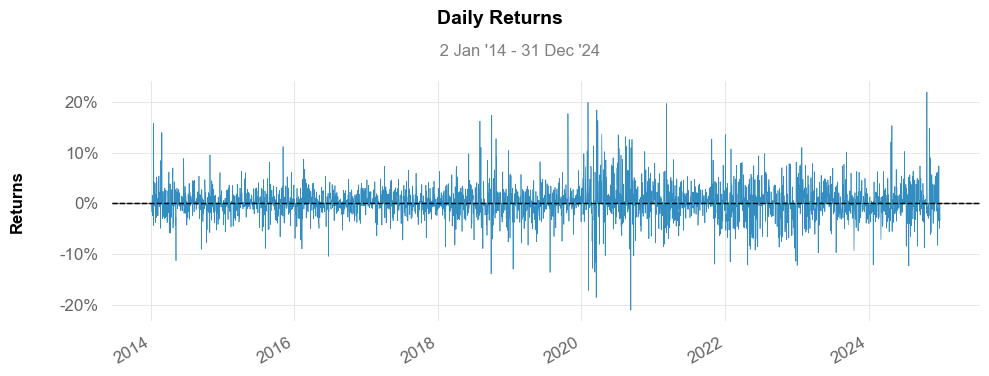

In [37]:
# Plotting Daily Returns for each stock
list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla]

for symbol in list_stocks: 
    print(f'\n{symbol.columns[0]} Daily Returns Plot:\n')
    qs.plots.daily_returns(symbol, benchmark=None)
    print('\n')

### Plot the *Cumulative Returns* chart for each of them using Quantstats 


AAPL Cumulative Retures Plot:


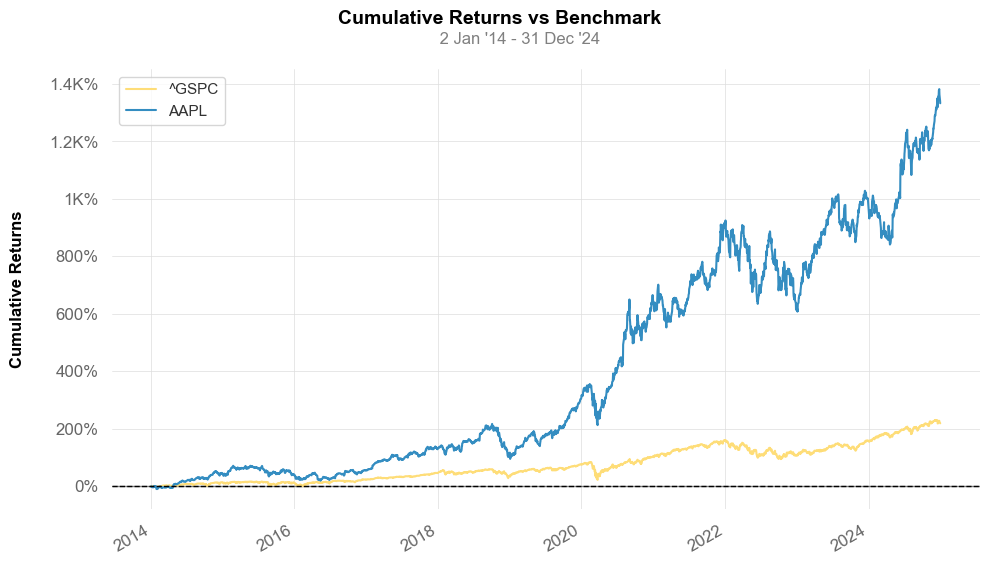




MSFT Cumulative Retures Plot:


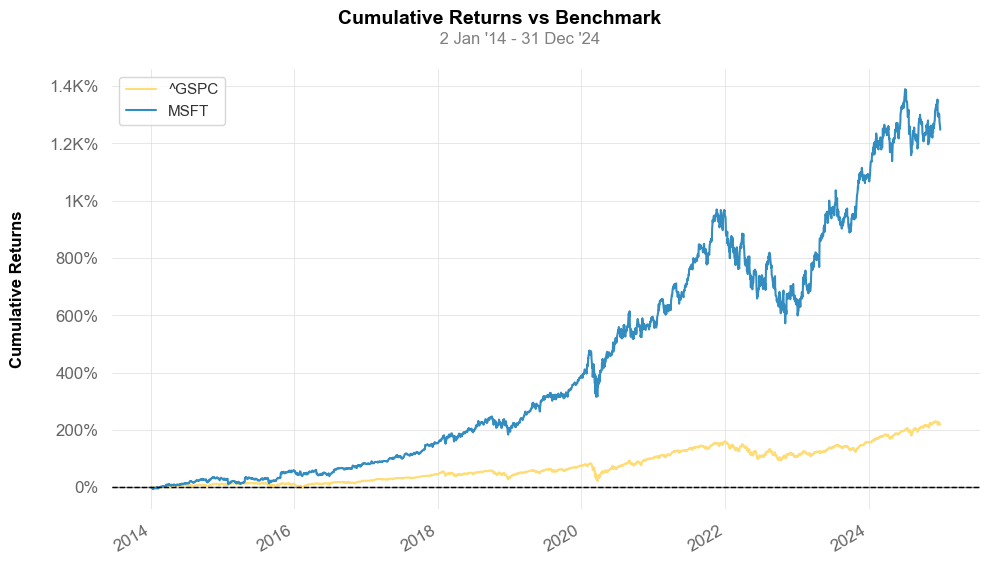




NVDA Cumulative Retures Plot:


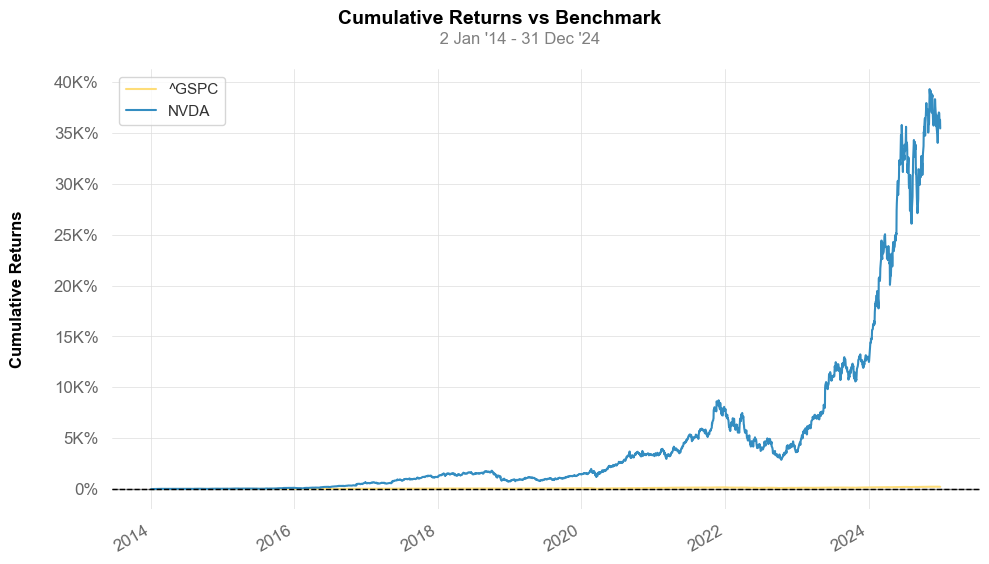




AMZN Cumulative Retures Plot:


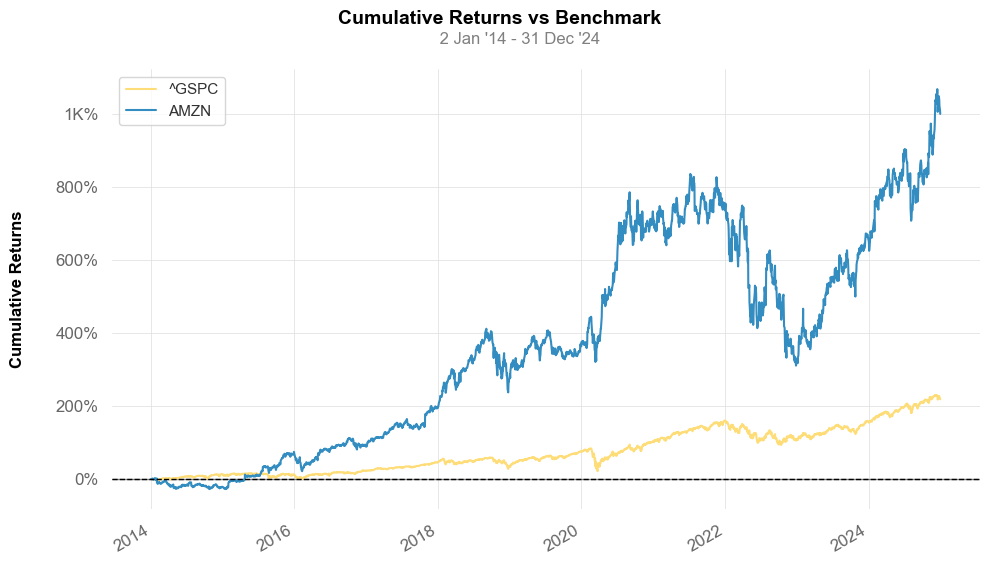




GOOG Cumulative Retures Plot:


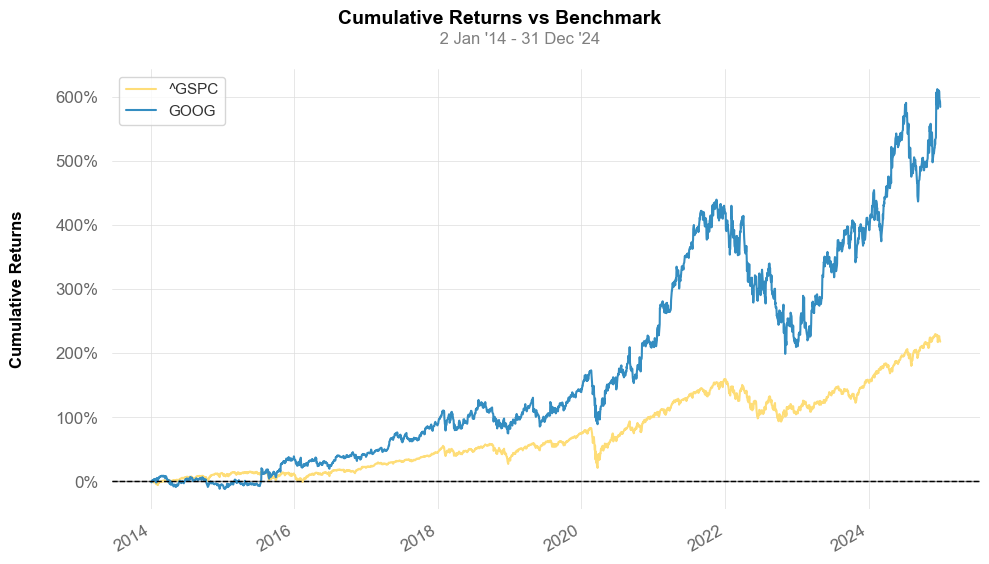




META Cumulative Retures Plot:


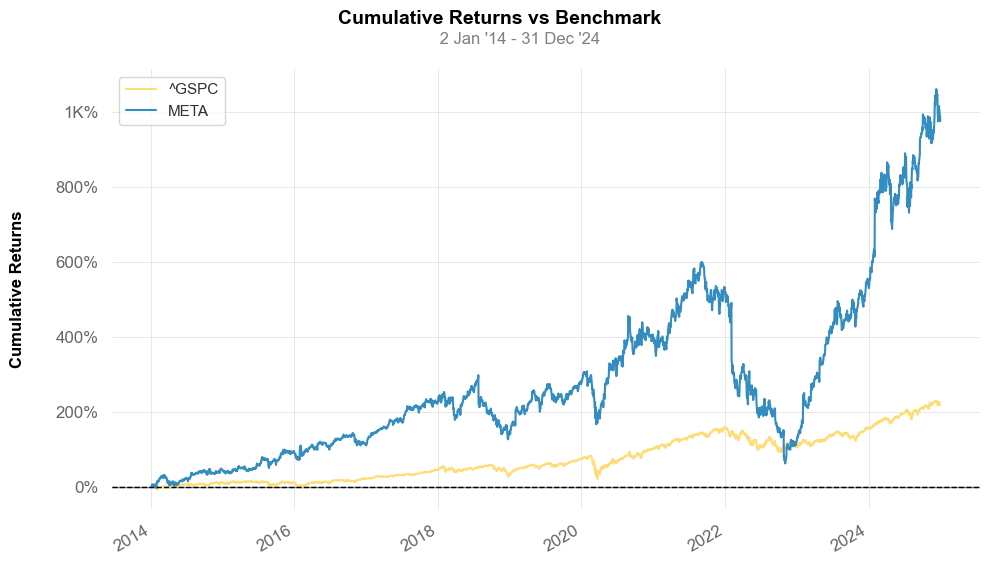




TSLA Cumulative Retures Plot:


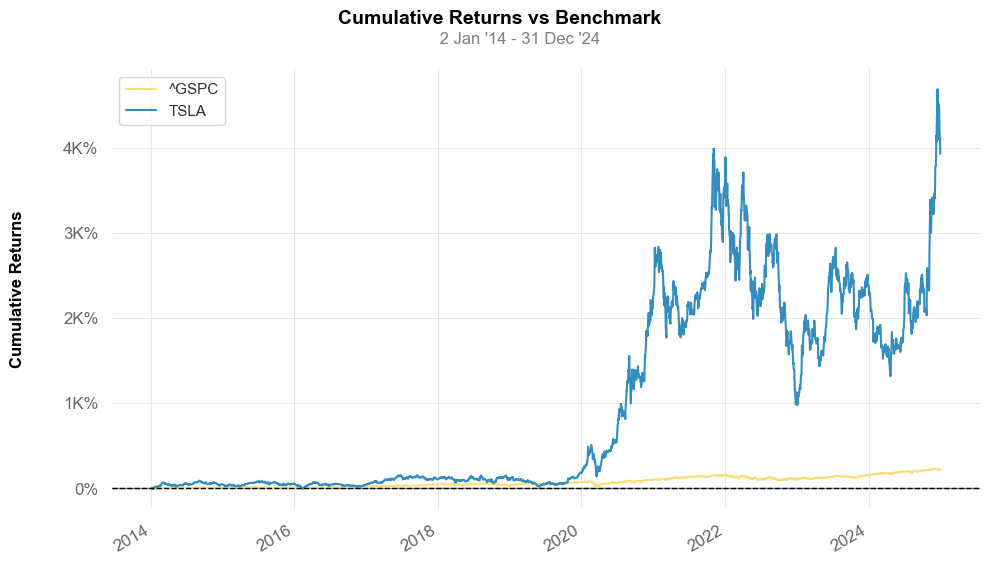

In [41]:
# Plotting Cumulative Returns for each stock
list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla]

for symbol in list_stocks: 
    print(f'\n{symbol.columns[0]} Cumulative Retures Plot:')
    qs.plots.returns(symbol, benchmark=sp500)
    print('\n')

### Histograms for daily returns 


AAPL Daily Returns Histogram


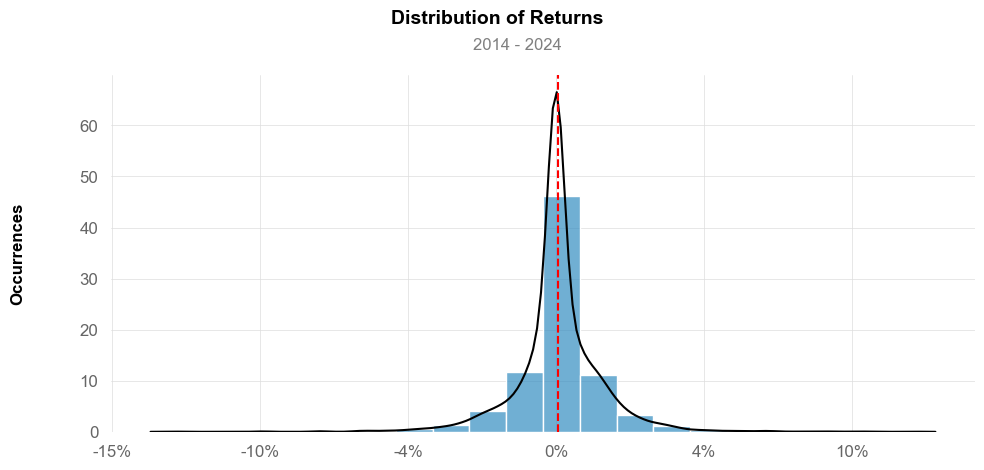




MSFT Daily Returns Histogram


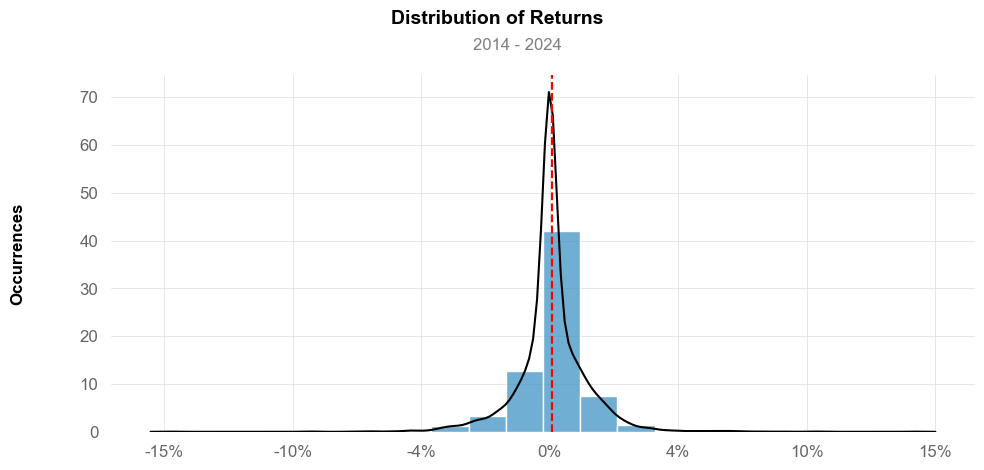




NVDA Daily Returns Histogram


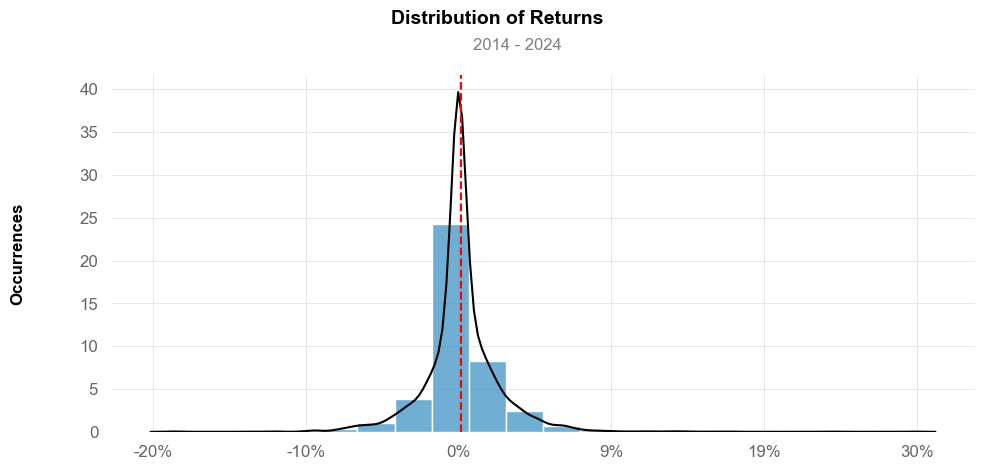




AMZN Daily Returns Histogram


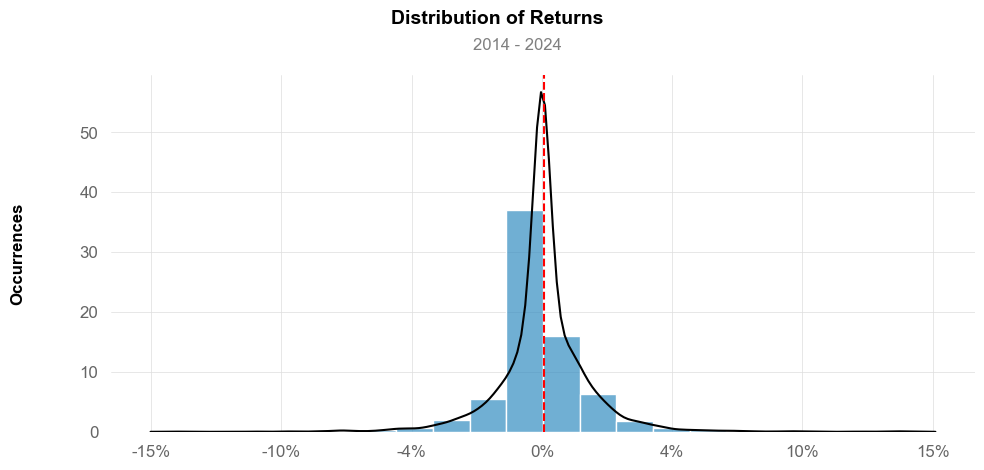




GOOG Daily Returns Histogram


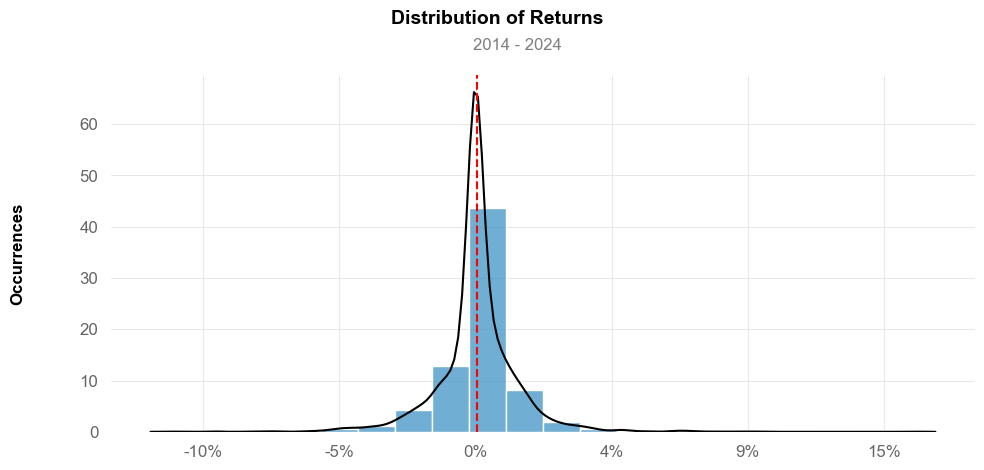




META Daily Returns Histogram


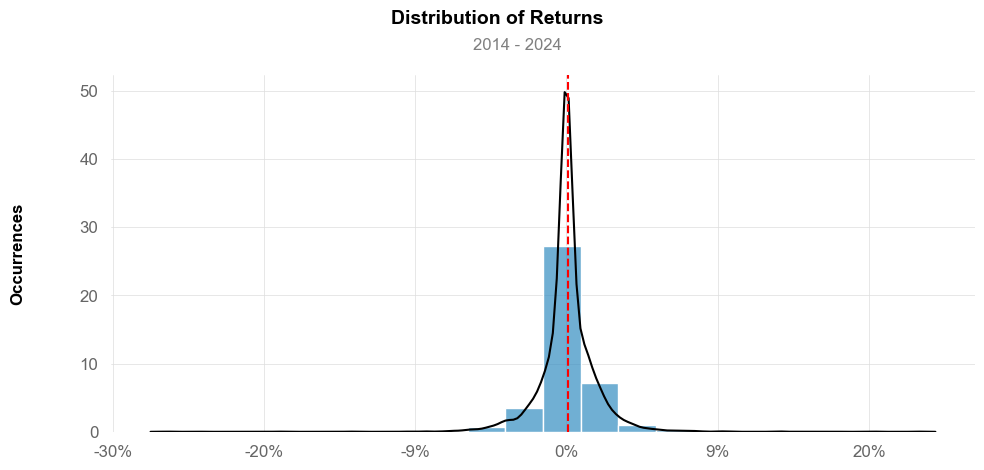




TSLA Daily Returns Histogram


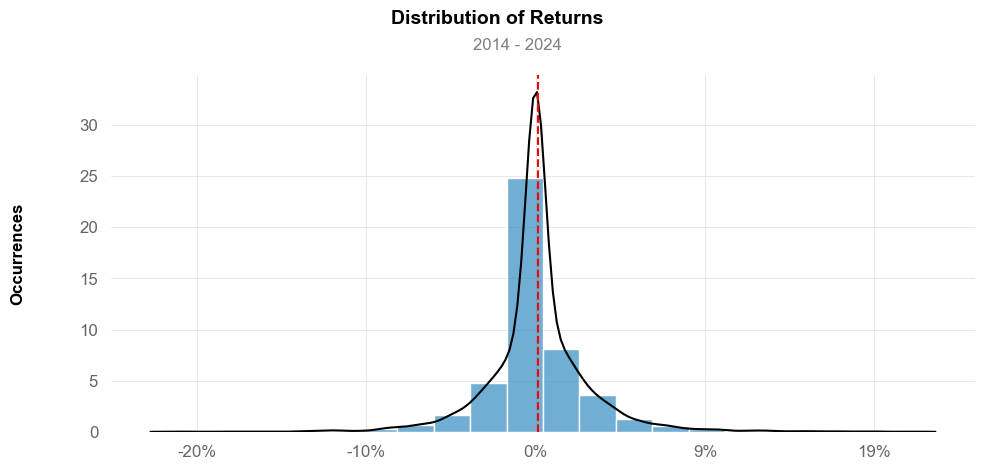

In [44]:
list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla]

for symbol in list_stocks: 
    print(f'\n{symbol.columns[0]} Daily Returns Histogram')
    qs.plots.histogram(symbol, resample='D')
    print('\n')

Histograms of daily returns ในการวิเคราะห์ ผลตอบแทนรายวัน (daily returns) ของสินทรัพย์ โดยช่วยให้นักลงทุนสามารถเข้าใจ ลักษณะของผลตอบแทน และ ความเสี่ยง (volatility) ของสินทรัพย์ได้ดียิ่งขึ้น ในหลายแง่มุม:

1. การวิเคราะห์ความผันผวน (Volatility):
Histograms แสดงการกระจายตัวของผลตอบแทนรายวัน ซึ่งช่วยให้นักลงทุนมองเห็นว่า ผลตอบแทนของสินทรัพย์มีการเปลี่ยนแปลงมากหรือน้อยในแต่ละวัน โดยสามารถดูได้จาก ความกว้างของกราฟ: หากกราฟกระจายกว้างแสดงว่า สินทรัพย์นั้นมีความผันผวนสูง หรือ ความเสี่ยงสูง (volatility มาก) หากกราฟมีการกระจายตัวที่แคบแสดงว่า ความผันผวนต่ำ หรือ ความเสี่ยงต่ำ

2. การวิเคราะห์การกระจายของผลตอบแทน:
การใช้ histogram จะช่วยให้เห็น รูปแบบการกระจาย (distribution) ของผลตอบแทนรายวัน ซึ่งอาจมีรูปแบบที่ สมมาตร (normal) หรือ เบี่ยงเบน (skewed)
Normal Distribution: ถ้าผลตอบแทนมีการกระจายแบบปกติ (bell-shaped curve) แสดงว่า ผลตอบแทนมีความคาดการณ์ได้ และสามารถคำนวณความเสี่ยงได้ง่าย
Skewed Distribution: หากการกระจายไม่เป็นปกติ (มีการเบี่ยงเบนไปทางขวาหรือซ้าย) อาจบ่งชี้ถึง ความเสี่ยงที่ไม่สมดุล หรือผลตอบแทนที่ไม่คาดการณ์ได้

3. การตรวจสอบขอบเขตของผลตอบแทน (Range):
Histogram ช่วยให้เราทราบว่า ผลตอบแทนในแต่ละวันอยู่ในช่วงไหน โดยการดูจำนวนครั้งที่ผลตอบแทนตกอยู่ในช่วงต่าง ๆ ซึ่งจะช่วยให้เห็นว่า สินทรัพย์มีช่วงผลตอบแทนที่กว้างหรือต่ำ เช่น ผลตอบแทนอาจจะอยู่ในช่วง +2% ถึง -2% โดยมาก หรืออาจมีความผันผวนกว้างกว่านั้น นักลงทุนสามารถใช้ข้อมูลนี้เพื่อประเมินว่า สินทรัพย์นั้นเสี่ยงมากแค่ไหน ในระยะสั้น (เช่น การลงทุนในระยะเวลาหลายวัน)

### Kurtosis

- Kurtosis = 3 → การแจกแจงแบบปกติ (Normal Distribution)
- Kurtosis > 3 → Fat tails → โอกาสเจอ extreme gains/losses สูง
- Kurtosis < 3 → Distribution แบน → Extreme movements เกิดยาก
- ค่า Kurtosis ของผลตอบแทนรายวันของหุ้นแต่ละตัว

In [49]:
list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla]

for symbol in list_stocks: 
    print(f'{symbol.columns[0]} kurtosis: {qs.stats.kurtosis(symbol).round(2)}')
    print('\n')

AAPL kurtosis: Ticker
AAPL    5.57
dtype: float64


MSFT kurtosis: Ticker
MSFT    7.91
dtype: float64


NVDA kurtosis: Ticker
NVDA    8.87
dtype: float64


AMZN kurtosis: Ticker
AMZN    6.31
dtype: float64


GOOG kurtosis: Ticker
GOOG    6.71
dtype: float64


META kurtosis: Ticker
META    20.7
dtype: float64


TSLA kurtosis: Ticker
TSLA    4.46
dtype: float64




### Standard Deviation

In [53]:
list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla]

for symbol in list_stocks: 
    print(f'{symbol.columns[0]} Standard Deviation from 2014 to 2024 : {symbol.std().round(3)}')
    print('\n')

AAPL Standard Deviation from 2014 to 2024 : Ticker
AAPL    0.018
dtype: float64


MSFT Standard Deviation from 2014 to 2024 : Ticker
MSFT    0.017
dtype: float64


NVDA Standard Deviation from 2014 to 2024 : Ticker
NVDA    0.03
dtype: float64


AMZN Standard Deviation from 2014 to 2024 : Ticker
AMZN    0.021
dtype: float64


GOOG Standard Deviation from 2014 to 2024 : Ticker
GOOG    0.018
dtype: float64


META Standard Deviation from 2014 to 2024 : Ticker
META    0.024
dtype: float64


TSLA Standard Deviation from 2014 to 2024 : Ticker
TSLA    0.036
dtype: float64




### Pairplots and Correlation Matrix

In [59]:
list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla]
merged_df = pd.concat(list_stocks, join='outer', axis=1)
merged_df

Ticker,AAPL,MSFT,NVDA,AMZN,GOOG,META,TSLA
Date,,,,,,,
2014-01-02,-0.014064,-0.006683,-0.009988,-0.002056,-0.006772,0.001098,-0.002194
2014-01-03,-0.021966,-0.006727,-0.011980,-0.003845,-0.007295,-0.002742,-0.003598
2014-01-06,0.005453,-0.021133,0.013401,-0.007088,0.011149,0.048387,-0.017117
2014-01-07,-0.007151,0.007750,0.016373,0.011178,0.019278,0.012587,0.016054
2014-01-08,0.006333,-0.017852,0.013631,0.009773,0.002081,0.005352,0.012855
...,...,...,...,...,...,...,...
2024-12-24,0.011478,0.009374,0.003938,0.017729,0.008062,0.013170,0.073572
2024-12-26,0.003176,-0.002777,-0.002068,-0.008732,-0.002379,-0.007240,-0.017630
2024-12-27,-0.013242,-0.017302,-0.020868,-0.014534,-0.015525,-0.005867,-0.049479


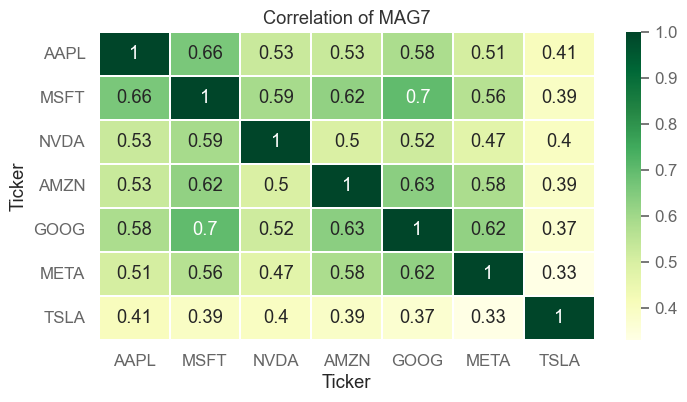

In [65]:
plt.figure(figsize=(8,4))
sns.heatmap(data=merged_df.corr(numeric_only=True), cmap='YlGn', annot=True, linewidths=.2)
plt.title('Correlation of MAG7')
plt.show()

<Figure size 500x500 with 0 Axes>

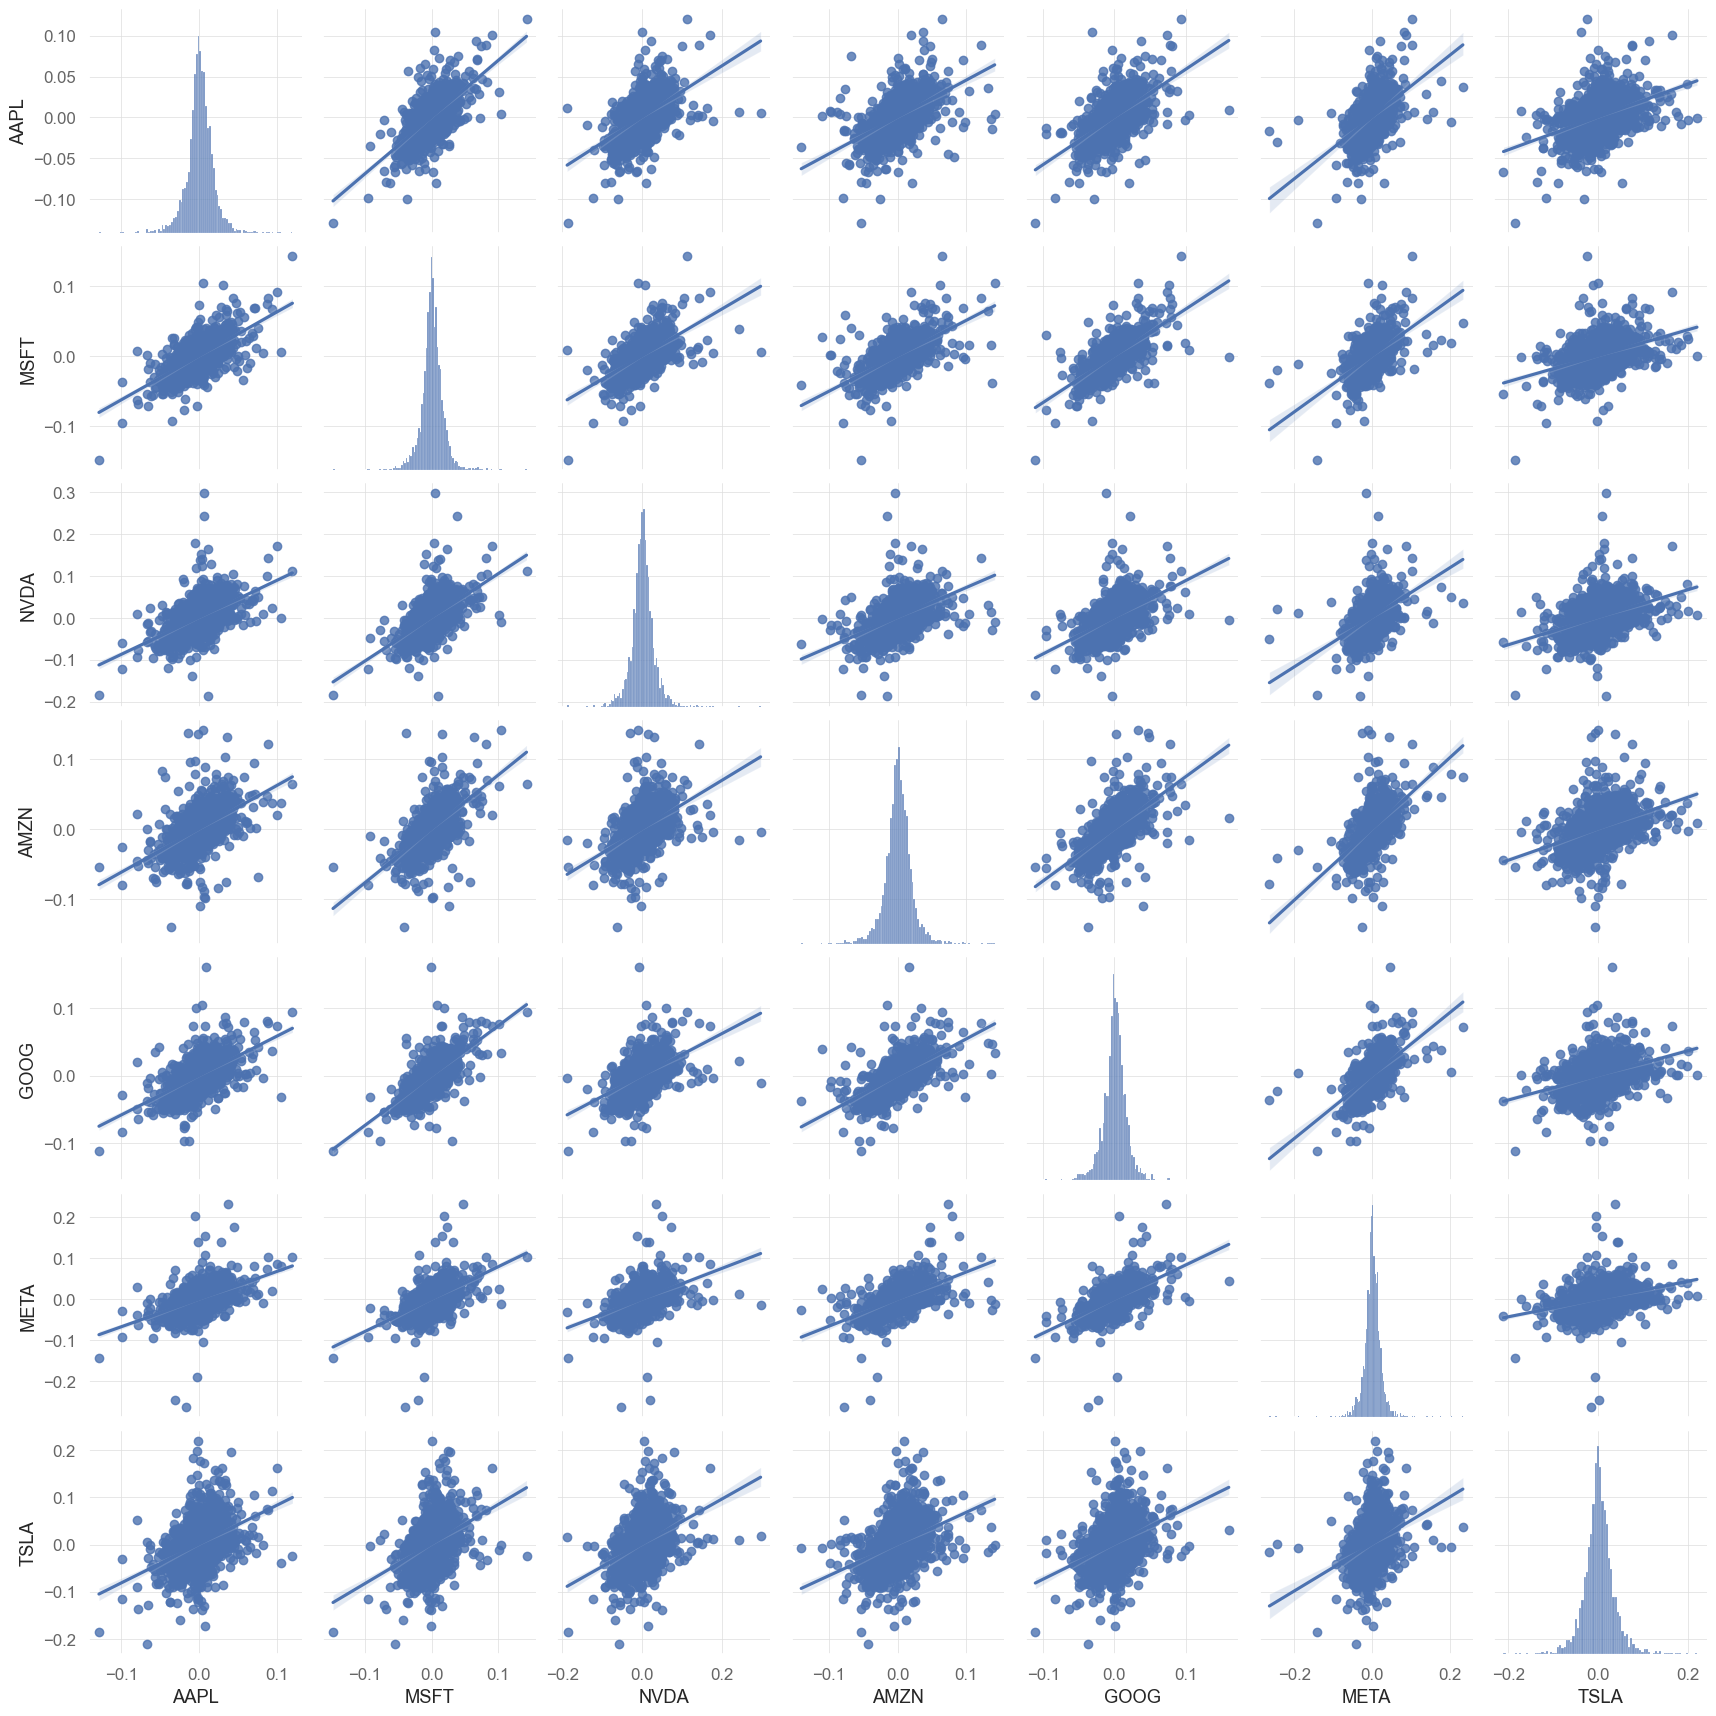

In [67]:
plt.figure(figsize=(5,5))
sns.pairplot(data=merged_df, kind='reg')
plt.show()

### Beta and Alpha

Beta และ Alpha เป็นตัวชี้วัดที่ใช้ในด้านการเงินเพื่อประเมินผลงานของหุ้นเมื่อเทียบกับตลาดโดยรวม เบต้าเป็นตัวชี้วัดความผันผวนของหุ้นเมื่อเทียบกับตลาด ค่าเบต้า 1 หมายความว่าหุ้นมีความผันผวนเท่ากับตลาด ค่าเบต้าที่มากกว่า 1 แสดงว่าหุ้นมีความผันผวนมากกว่าตลาด และค่าเบต้าที่น้อยกว่า 1 แสดงว่าหุ้นมีความผันผวนน้อยกว่า

Alpha เป็นการวัดผลตอบแทนส่วนเกินของหุ้นเมื่อเทียบกับผลงานที่คาดหวังตามค่าเบต้า อัลฟ่าที่เป็นบวกบ่งชี้ว่าหุ้นมีผลงานดีกว่าที่คาดหวังตามค่าเบต้า ในขณะที่อัลฟ่าที่เป็นลบบ่งชี้ว่าผลงานต่ำกว่ามาตรฐาน การวิเคราะห์ค่าเบต้าและอัลฟ่าของหุ้นจะช่วยให้นักลงทุนเข้าใจความเสี่ยงและผลตอบแทนที่คาดว่าจะได้รับของหุ้นเมื่อเทียบกับตลาดได้ดีขึ้น และสามารถตัดสินใจลงทุนได้อย่างรอบรู้ตามนั้น

In [78]:
# load data on the SP500
start_date = '2014-01-01'
end_date = '2024-12-31'

sp500 = qs.utils.download_returns('^GSPC') # ^GSPC คือชื่อดัชนี S&P 500 บน Yahoo Finance
sp500 = sp500.loc[start_date:end_date]

if sp500.index.tz is not None:
    sp500.index = sp500.index.tz_convert(None)

print('✅ Getting info for stocks complete!')
sp500

[*********************100%***********************]  1 of 1 completed

✅ Getting info for stocks complete!


Ticker,^GSPC
Date,
2014-01-02,-0.008862
2014-01-03,-0.000333
2014-01-06,-0.002512
2014-01-07,0.006082
2014-01-08,-0.000212
...,...
2024-12-24,0.011043
2024-12-26,-0.000406
2024-12-27,-0.011056


In [82]:
# Removeing Index 
sp500_no_index = sp500.reset_index(drop=True)
aapl_no_index = aapl.reset_index(drop=True)
msft_no_index = msft.reset_index(drop=True)
nvda_no_index = nvda.reset_index(drop=True)
amzn_no_index = amzn.reset_index(drop=True)
goog_no_index = goog.reset_index(drop=True)
meta_no_index = meta.reset_index(drop=True)
tsla_no_index = tsla.reset_index(drop=True)

# Daily returns without index
stocks_no_index = [sp500_no_index, aapl_no_index,
                  msft_no_index, nvda_no_index,
                  amzn_no_index, goog_no_index, 
                  meta_no_index, tsla_no_index]

# Display daily returns
for i, stock in enumerate(stocks_no_index):
    print(f'Daily returns for stock {i+1} without index:')
    print(stock)
    print('*' * 70)

Daily returns for stock 1 without index:
Ticker     ^GSPC
0      -0.008862
1      -0.000333
2      -0.002512
3       0.006082
4      -0.000212
...          ...
2763    0.011043
2764   -0.000406
2765   -0.011056
2766   -0.010702
2767   -0.004285

[2768 rows x 1 columns]
**********************************************************************
Daily returns for stock 2 without index:
Ticker      AAPL
0      -0.014064
1      -0.021966
2       0.005453
3      -0.007151
4       0.006333
...          ...
2763    0.011478
2764    0.003176
2765   -0.013242
2766   -0.013263
2767   -0.007058

[2768 rows x 1 columns]
**********************************************************************
Daily returns for stock 3 without index:
Ticker      MSFT
0      -0.006683
1      -0.006727
2      -0.021133
3       0.007750
4      -0.017852
...          ...
2763    0.009374
2764   -0.002777
2765   -0.017302
2766   -0.013240
2767   -0.007838

[2768 rows x 1 columns]
************************************************

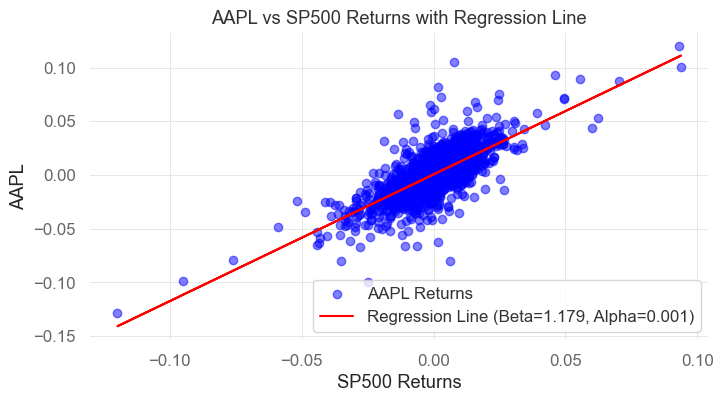

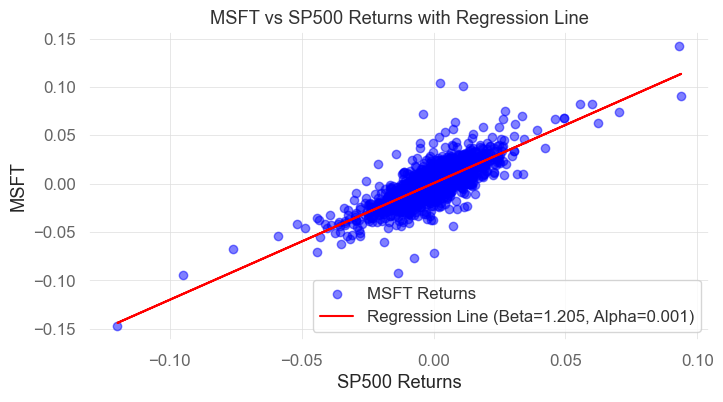

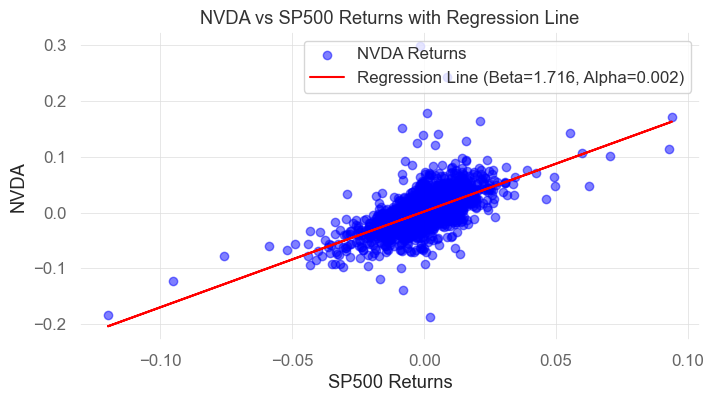

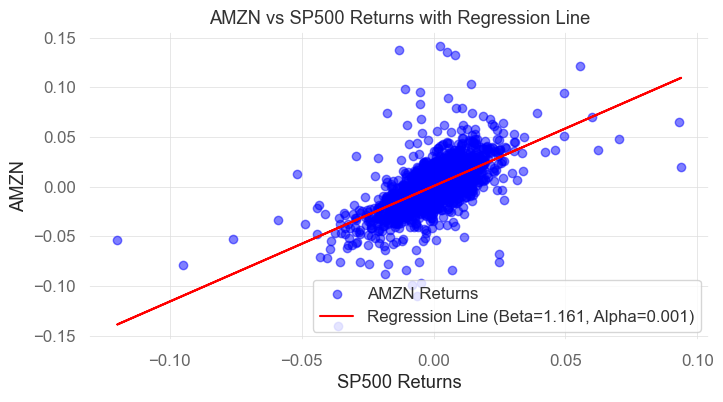

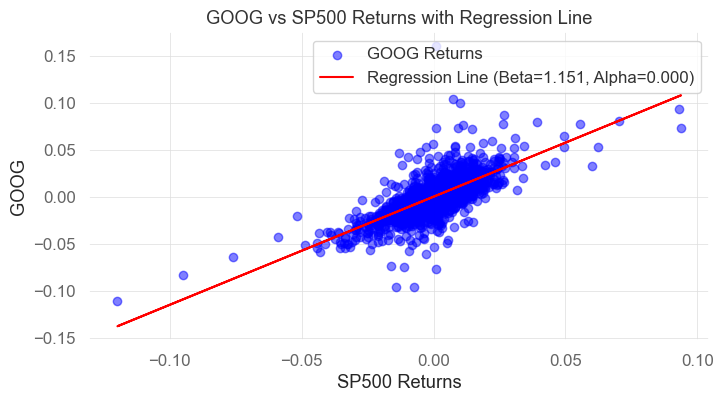

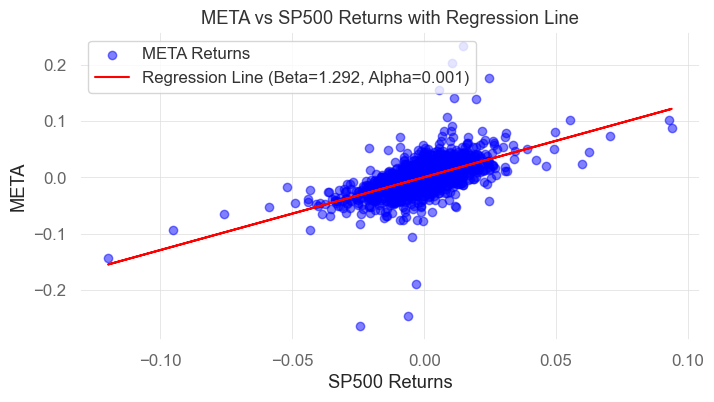

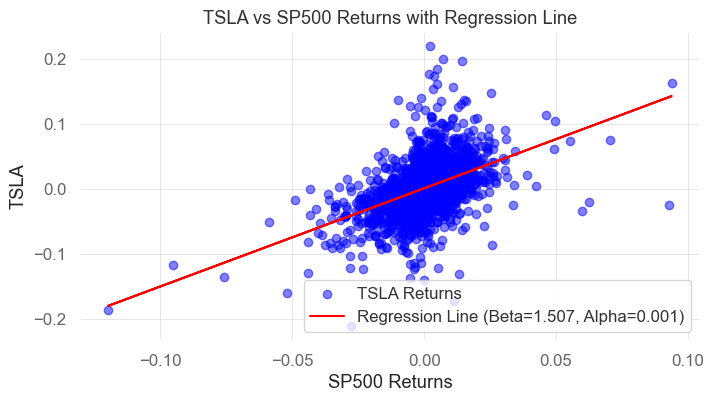

In [84]:
from sklearn.linear_model import LinearRegression

stocks_no_index = [aapl_no_index, msft_no_index, nvda_no_index,
                  amzn_no_index, goog_no_index, meta_no_index, tsla_no_index]

for no_index in stocks_no_index: 
    X = sp500_no_index.values.reshape(-1,1)
    y = no_index.values.reshape(-1,1)
    model_linear = LinearRegression().fit(X,y)
    y_pred = model_linear.predict(X)
    
    beta = model_linear.coef_[0][0]
    alpha = model_linear.intercept_[0]

    plt.figure(figsize=(8, 4))
    plt.scatter(X, y, color='blue', label=f'{no_index.columns[0]} Returns', alpha=0.5)
    plt.plot(X, y_pred, color='red', label=f'Regression Line (Beta={beta:.3f}, Alpha={alpha:.3f})') # Plot Regression Line
    plt.title(f'{no_index.columns[0]} vs SP500 Returns with Regression Line')
    plt.xlabel('SP500 Returns')
    plt.ylabel(f'{no_index.columns[0]}')
    plt.legend()
    plt.show()

### Sharpe Ratio

- Sharpe Ratio (หรือ Sharpe Index) คือ มาตรวัดความเสี่ยง ที่ช่วยประเมินผลตอบแทนที่ได้รับ ต่อ ความเสี่ยง ของการลงทุน โดยคำนวณจากความแตกต่างระหว่าง ผลตอบแทนของการลงทุน และ ผลตอบแทนไร้ความเสี่ยง (Risk-free rate) ซึ่งมักจะใช้ผลตอบแทนจากพันธบัตรรัฐบาลเป็นเกณฑ์เปรียบเทียบ และหารด้วย ส่วนเบี่ยงเบนมาตรฐาน (Standard deviation) ของผลตอบแทนการลงทุน เพื่อวัดความผันผวน
- Sharpe Ratio > 1: พอร์ตการลงทุนให้ผลตอบแทนที่คุ้มค่ากับความเสี่ยงที่รับได้
- Sharpe Ratio > 2: ผลตอบแทนที่ได้จากการลงทุนสูงกว่าความเสี่ยงที่รับ
- Sharpe Ratio > 3: ถือเป็นการลงทุนที่มีความเสี่ยงต่ำและให้ผลตอบแทนที่ดี
- Sharpe Ratio < 1: หมายความว่าผลตอบแทนของพอร์ตการลงทุนไม่คุ้มกับความเสี่ยงที่รับ
- Sharpe Ratio = 0: ผลตอบแทนที่ได้จากการลงทุนเท่ากับผลตอบแทนไร้ความเสี่ยง

In [291]:
stocks = [aapl, tsla, nvda, msft]

for stock in stocks: 
    print(f'Sharpe Ratio for {stock.columns[0]} : {qs.stats.sharpe(stock).round(2)}')
    print('\n')

Sharpe Ratio for AAPL : Ticker
AAPL    0.96
dtype: float64


Sharpe Ratio for TSLA : Ticker
TSLA    0.96
dtype: float64


Sharpe Ratio for NVDA : Ticker
NVDA    1.06
dtype: float64


Sharpe Ratio for MSFT : Ticker
MSFT    0.97
dtype: float64




## Initial Conclusions